# Preprocess and Chart Employees' Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

Below is a preview of a couple of columns we'll work with from the dete_survey.csv:

* **ID**: An id used to identify the participant of the survey
* **SeparationType**: The reason why the person's employment ended
* **Cease Date**: The year or month the personm's employment ended
* **DETE Start Date**: The year the person began employment with the DETE

Below is a preview of a couple of columns we'll work with from the tafe_survey.csv:

* **Record ID**: An id used to identify the participant of the survey
* **Reason for ceasing employment**: The reason why the person's employment ended
* **LengthofServiceOverall. Overall Length of Service at Institute (in years)**: The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("datasets/dete_survey.csv")
tafe_survey = pd.read_csv("datasets/tafe_survey.csv")

# Disable columns truncation
pd.options.display.max_columns = 75

print(dete_survey.head())
print(dete_survey.info())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [2]:
print(tafe_survey.head())
print(tafe_survey.info())

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

So, `dete_survey` data frame has 'Not Stated' values as indicators of missing data, but they misrepresent `NaN`.

Both the `dete_survey` and `tafe_survey` data frames got columns that have no use for our analysis.

Both data frames have the same columns but with different names.

There are multiple columns with an indication of an employee resigning because of dissatisfaction.

For now, let's start with the first two issues.

In [3]:
dete_survey = pd.read_csv("datasets/dete_survey.csv", na_values='Not Stated') # 'Not Stated' values will be read as NaN
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1) # dropping columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

We started by re-reading our CSV file in the case of `dete_survey`. But with the added parameter of `na_values`. Na_values is a parameter that labels the argument we set automatically a `NaN`, which helps us immensely.

Then we dropped the columns which we have no use for our analysis from both of the datasets.

Since we got rid of the columns, we won't need. We can start working at columns we've got left. Both of these data frames contain the same columns but with different names.

|dete_survey|tafe_survey|Definition|
|-----------|-----------|----------|
|ID|Record ID|AN id used to identify the participant of the survey|
|SeperationType|Reason for ceasing employment|The reason why the participant's employment ended|
|Cease Date|CESSATION YEAR|The year or month the participant's employment ended|
|DETE Start Date| | The year the participant began employment with the DETE|
| |LengthofServiceOverall. Overall Length of Service at Institutue (in years)|The length of the person's employment (in years)|
|Age|CurrentAge. Current Age|The age of the participant.|

Let's standardize these column names:

In [4]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()
# .lower to  lower all the characters in the string values of columns
# .replace to replace all blank spaces with underscores
# .strip to get rid of all the extra blank spaces that may still exist

In [5]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [6]:
tafe_survey_updated =  ( tafe_survey_updated.rename(
    {'Record ID':'id','CESSATION YEAR':'cease_date',
     'Reason for ceasing employment':'separationtype',
     'Gender. What is your Gender?':'gender',
     'CurrentAge. Current Age':'age','Employment Type. Employment Type':'employment_status',
     'Classification. Classification':'position',
     'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
     'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}, axis =1) )
# ( )s to make our cord work separated through lines

In [7]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [8]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


To standardize our column names, we started with the `dete_survey_updated` dataset. We lowercased all our letters then got rid of all the whitespaces -replacing them with underscores. Then we stripped the extra whitespaces we could have left behind with the str.strip() method. The result gave us a template we could use on our other dataset.

In the `tafe_survery_updated` database, we've used the naming convention of the previous dataset. Replacing all the columns' names to match each other made it possible for us to merge both databases. But before thinking about merging these databases, we should get back to getting rid of the data we don't need. To do so, we should remember our end goal for this project:

* Are employees who have only worked for the institutes for a short time resign due to some dissatisfaction? What about employees who have been at the job longer?

Looking at the unique values in the `seperationtype` columns, there are a couple of different separation types. For this project, we'll only analyze survey respondents who _resigned_, so their separation type contains the string ``'Resignation'``.

You should note that `dete_survey_updated` data frame contains multiple separation types with the string Resignation:

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate



In [10]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
dete_resignations = dete_survey_updated.copy() # creates a copy of the dataframe
tafe_resignations = tafe_survey_updated.copy()
dete_resignations = dete_resignations[dete_resignations["separationtype"].str.contains('Resignation')]
# Extract columns containing the string Resignation
tafe_resignations = tafe_resignations[tafe_resignations["separationtype"] == 'Resignation'] 
# Boolean masking is easier but only possible because this dataset is cleaner.

In [13]:
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [14]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

Since we only take into account separations that happened as resignations, we extracted only those types of separations from our datasets. Note that, to avoid an issue called [SettingWithCopy Warning](https://www.dataquest.io/blog/settingwithcopywarning/), we've created a copy of our datasets.

Then we've extracted only the rows with Resignation types of `separationtype`. Since `dete_resignations` had three types of resignations we've used `str.contains` a vectorized method in our indexing.

Before going any further, we need to make sure of some things that the data itself makes sense!

The most crucial aspect of our dataset is start and end dates of a worker's employment - which corresponds to `cease_date` (last year) and `date_start_date`. 

In [15]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract("([1-2][0-9][0-9][0-9])", expand=True)
# Extract with a regular expression

In [17]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float) # Casts the column type to float

In [18]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [20]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Observe there aren't any significant issues with the years. The span of years isn't quite the same, however.

Since we're positive our data isn't corrupt, we're going to use `dete_resignations`data frame to create a new column. Let's recall the end goal for our analysis: 

* Are employees who have only worked for the institutes for a short time resign due to some dissatisfaction? What about employees who have been at the job longer?

In the Human Resources, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the `tafe_resignations` data frame already contains a service column, which we've renamed to `institute_service`. To analyze both surveys together, we'll have to create a corresponding `instittue_service` column in `dete_resignations`.

Do we have data that can be used to calculate the time the employee spent in their workplace?


In [21]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"] 

In [22]:
dete_resignations["institute_service"].value_counts().head(10)

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
Name: institute_service, dtype: int64

We have our new column ready with the length of time of employment. Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as dissatisfied with each data frame.

`tafe_survey_updated`:

* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

`dete_survey_updated`:

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee had any of these factors above as a reason for their resignation, they will be marked as dissatisfied.

The new column `dissatisfied` will be created as:

* In the `tafe_resignations` data frame, convert the values `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns to True, False or NaN.

* If any of the columns listed above contain a True value, we'll add a True value to a new column named `dissatisfied`.


In [23]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
def update_vals(vals): # take a value
    if pd.isnull(vals): #check if its null
        return np.nan  # return NaN if it is 
    if vals == '-':    # if it is -
        return False   # return False
    else:              # for all other conditions
        return True    

tafe_resignations_up = tafe_resignations.copy()    # creating a copy to avoid problems
tafe_any = ( tafe_resignations[['Contributing Factors. Dissatisfaction',
                               'Contributing Factors. Job Dissatisfaction']]
            .applymap(update_vals) ) # apply our function to the columns we're interested in
tafe_resignations_up["dissatisfied"] = tafe_any.any(axis=1, skipna=False) # use the previous column to create new one

dete_resignations_up = dete_resignations.copy() # same as the previous one
dete_any = ( dete_resignations[
                        ["job_dissatisfaction","dissatisfaction_with_the_department",
            "physical_work_environment","lack_of_recognition","lack_of_job_security",
                "work_location","employment_conditions","work_life_balance","workload"]
                              ] )
dete_resignations_up["dissatisfied"] = dete_any.any(axis=1, skipna=False)

In [26]:
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [27]:
tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

As we've instructed, we did the following changes:

* Label the values in the following columns `'Contributing Factors. Dissatisfaction'`,`'Contributing Factors. Job Dissatisfaction'`, as True, False or NaN, and if any of both columns are True, we label the new value we create in `dissatisfied` as True. If not, false. And if the value is NaN, we pass NaN.

We did the same for our other data frame, `dete_resignations`, as well. We've applied the function update_vals to columns we labeled as an indicator of dissatisfaction. Then created a new column with the any method to see if there's a True value in any of the chosen columns.

So far, we have:
    
* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

At long last we're ready to combine both of our datasets into one and start our analysis.

In [28]:
dete_resignations_up["institute"] = 'DETE'
tafe_resignations_up["institute"] = 'TAFE'

In [29]:
tafe_resignations_up["institute_service"].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [30]:
dete_resignations_up["institute_service"].value_counts(dropna=False).head()

NaN    38
5.0    23
1.0    22
3.0    20
0.0    20
Name: institute_service, dtype: int64

The `institute_service` column is the column we're going to aggregate to do our analysis. As you see, `tafe_resignations` version of institute service is properly grouped to intervals opposed to single values. We like that, and before we join our datasets together we think we should fix dete dataset, so they are mirroring their grouping to `tafe_resignations_up`.

To do that, we're going to write ourselves a method that classifies the argument it takes, mirroring the groupings in `tafe_resignations_up`'s `institute_service`. Then we're going to apply the function to the same column in `dete_resignations_up`.

After that, we can join our datasets.

In [31]:
def yearsapp(val):                   # take a value and, if conditions meet, return the value
    if val < 1.0:
        return "Less than 1 year"
    if val < 3.0:
        return '1-2'
    if val < 5.0:
        return '3-4'
    if val < 7.0:
        return '5-6'
    if val < 11.0:
        return '7-10'
    if val < 21.0:
        return '11-20'
    if val >= 21.0:
        return "More than 20 years"
    if val == pd.isnull(val):
        return np.nan
dete_resignations_up["institute_service"] = dete_resignations_up["institute_service"].apply(yearsapp) # applying it
dete_resignations_up["institute_service"].value_counts()

11-20                 57
More than 20 years    43
7-10                  41
5-6                   40
3-4                   36
1-2                   36
Less than 1 year      20
Name: institute_service, dtype: int64

In [32]:
combined = ( pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True) ) # combining the datasets

In [33]:
combined["institute_service"].value_counts()

1-2                   100
3-4                    99
Less than 1 year       93
11-20                  83
5-6                    73
7-10                   62
More than 20 years     53
Name: institute_service, dtype: int64

In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

This new dataset is analysis-ready. But it's a bit bloated. It contains data we've worked with to create relevant columns. We can drop them by naming them or use a wholesome approach for our dropna method. Setting a threshold with the `thresh` parameter and dropping every column with less than 500 non-null entries.

In [35]:
combined_updated = combined.dropna(thresh=500, axis=1)

In [36]:
combined_updated["institute_service"].value_counts(dropna=False)

1-2                   100
3-4                    99
Less than 1 year       93
NaN                    88
11-20                  83
5-6                    73
7-10                   62
More than 20 years     53
Name: institute_service, dtype: int64

In [37]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


Hold on! Our team proved us a better way to categorize years for our `institute_service` column. They've provided us [this](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) link, which has guidelines to better categorize stages of an employee. We need to re-think our approach to `institute_service` column.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [38]:
combined_updated["institute_service"].value_counts()

1-2                   100
3-4                    99
Less than 1 year       93
11-20                  83
5-6                    73
7-10                   62
More than 20 years     53
Name: institute_service, dtype: int64

In [39]:
def yearscat(vals):
    if vals == '1-2':
        return 'New'
    if vals == 'Less than 1 year':
        return 'New'
    if vals == '3-4':
        return 'Experienced'
    if vals == '5-6':
        return 'Experienced'
    if vals == '7-10':
        return 'Established'
    if vals == '11-20':
        return 'Veteran'
    if vals == 'More than 20 years':
        return 'Veteran'
    if vals == pd.isnull(vals):
        return np.nan
combined_new = combined_updated.copy()
combined_new["service_cat"] = combined_new["institute_service"].apply(yearscat)

Let's see check if everything is ok!

In [40]:
combined_new[["service_cat","institute_service"]].head(16)

,service_cat,institute_service
0,Established,7-10
1,Veteran,11-20
2,Experienced,3-4
3,Veteran,11-20
4,Experienced,3-4
5,Veteran,11-20
6,Experienced,5-6
7,None,None
8,Veteran,More than 20 years
9,Veteran,More than 20 years


In [41]:
combined_new["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [42]:
combined_new.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7-10,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,11-20,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3-4,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,11-20,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3-4,False,DETE,Experienced


Our dataset is long last ready for analysis!

In [43]:
combined_new["dissatisfied"].value_counts(dropna=False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

Since most of the columns are False we'll fill our missing values with them.

In [44]:
combined_new["dissatisfied"].fillna(False, inplace=True)
combined_new["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Job Dissatisfaction by Service Category


Before visualization let's take a look at our values with a pivot table.

In [45]:
combined_new.pivot_table(values='dissatisfied', index='service_cat')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


Now use the pivot table to create a bar chart!

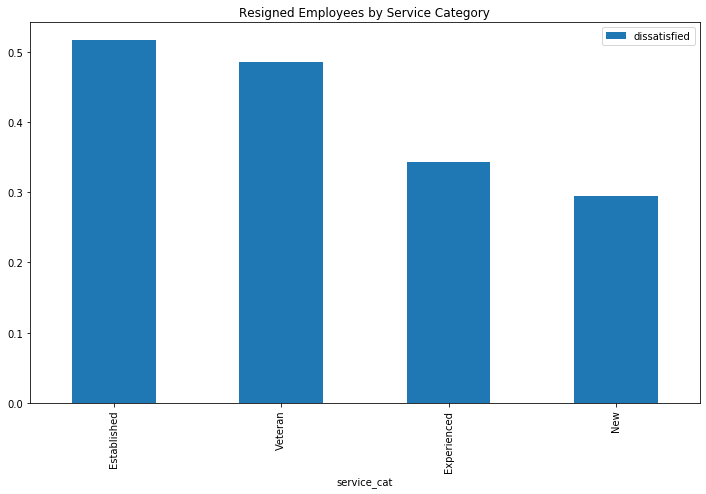

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

( combined_new.pivot_table(values='dissatisfied', index='service_cat')
    .sort_values('dissatisfied', ascending=False)
     .plot(kind='bar', figsize=(12,7), title='Resigned Employees by Service Category' )
)

## Job Dissatisfaction By Ages

We're now going to compare job dissatisfaction between the age of the employees. We're figuring out if the age of the owner effects their dissatisfaction.

Similar to our previous approach we're going to clear our Age column, split to generational groups and then aggregate groups followed by plotting for convenience.

In [47]:
combined_new['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Having 55 Nan values really isn't helping us here. Some ages are ranges. We first will extract the first number then group them. For our purposes our groupings will be:

    Boomers: 55 and older.
    Gen X: 40-54 years.
    Millennials: 25-39 years.
    Gen Z: 24 and younger.

In [48]:
# Extract the first age and convert it to float type
combined_new["age_up"] = combined_new["age"].str.extract(r"(\d+)") # a regular expression to extract first number
combined_new["age_up"] = combined_new["age_up"].astype(float) # we cast them back to a numerical value

# Check if the data is correct
combined_new["age_up"].value_counts(dropna=False).sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
NaN     55
Name: age_up, dtype: int64

In [49]:
# Function to split ages into generational groups
def age_gen(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 24:
        return "Gen Z"
    elif age > 24 and age <= 39:
        return "Millennials"
    elif age > 39 and age <= 54:
        return "Gen X"
    else:
        return "Baby Boomers"
    
# Apply the function to the age column
combined_new["age_cat"] = combined_new["age_up"].apply(age_gen)

# Check if the data is correct
combined_new["age_cat"].value_counts(dropna=False)

Gen X           245
Millennials     201
Baby Boomers     78
Gen Z            72
NaN              55
Name: age_cat, dtype: int64

Now let's replicate our previous process of creating a pivot table and then plot it.

In [50]:
# Pivot table: dissatisfied by generation
combined_new['age_cat']

0      Millennials
1            Gen X
2      Millennials
3            Gen X
4      Millennials
          ...     
646          Gen Z
647          Gen X
648            NaN
649          Gen X
650    Millennials
Name: age_cat, Length: 651, dtype: object

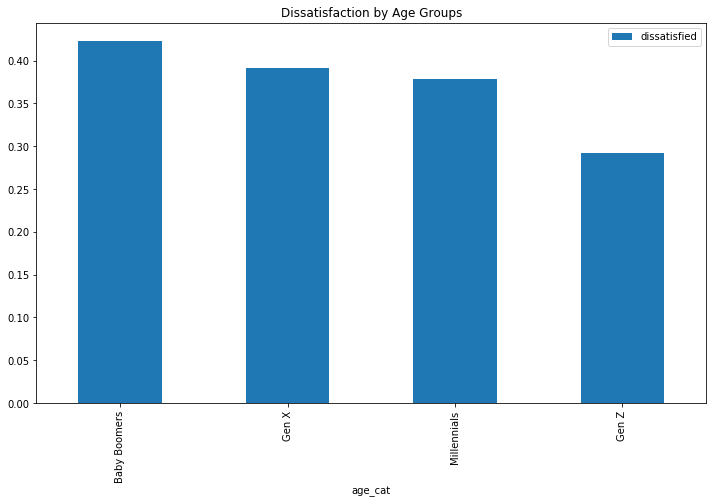

In [53]:
( combined_new.pivot_table(index='age_cat', values='dissatisfied')
 .sort_values('dissatisfied', ascending=False)
 .plot(kind='bar', figsize=(12,7), title='Dissatisfaction by Age Groups')
      )


## Conclusion


A quick analysis shows resignations occured because of dissatisfaction mostly in the `Established` and `Veteran` groups. So longer an employee works for a company the more he or she is likely to resign out of dissatisfaction. `Experienced` groups take a significant drop compared to `Veterans` and `New` subpart is the least likely to feel dissatisfied and resign.

Generation Z is the most satisfied workers group. Followed by Millenials and Generation X. These two groups are identical to each other in their job dissatisfacton. Baby Boomers are the least satisfied workers generation. There may be a correlation at work here. Since they are older they are more likely in the `Established` and `Veteran` groups.

In order to create one visualization, we completed the following tasks:

* Explored the data and figured out how to prepare it for analysis
* Corrected some of the missing values
* Dropped any data not needed for our analysis
* Renamed our columns
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way
* Combined the data
* Cleaned the institute_service column
* Handled the missing values in the dissatisfied column
* Aggregated the data